## Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Preparing Dataset

Text(0, 0.5, 'Y Dataset')

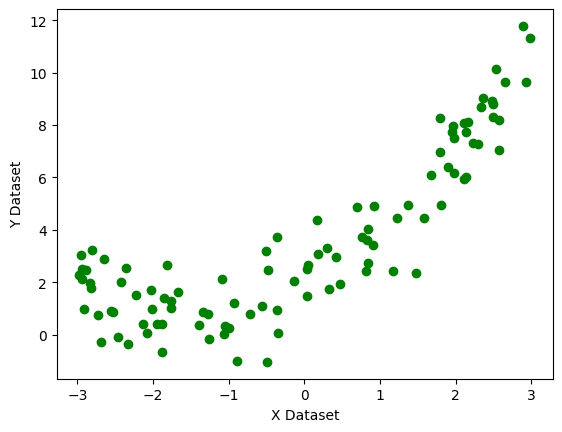

In [3]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

# quadratic eqn used => y = 0.5x^2 + 1.5x + 2 + outlier
plt.scatter(X, y, color='g')
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Let's Implement a Simple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regression_one = LinearRegression()

<p>We had use normalized values only so skipping that step</p>

In [7]:
regression_one.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression_one.predict(X_test))
print(score)

# Less accuracy

0.6585160885612811


### Lets visualize

Text(0, 0.5, 'Y')

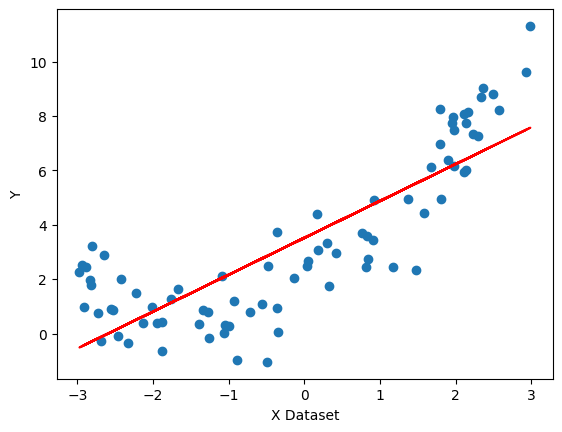

In [11]:
plt.plot(X_train, regression_one.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

### Solving with Polynomial 

<p> Lets apply polynomial transformation</p>

In [13]:
from sklearn.preprocessing import PolynomialFeatures

<p>check the h thetha eqn in notes</p>
<p>degree 2 means we are writing degree 2 eqn</p>
<p>include bias means we are going to multiply 1 by Beta 0</p>

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
X_train_poly

array([[ 1.00000000e+00, -2.72989560e+00,  7.45232999e+00],
       [ 1.00000000e+00, -2.81969643e+00,  7.95068796e+00],
       [ 1.00000000e+00,  1.17651088e+00,  1.38417785e+00],
       [ 1.00000000e+00, -4.81523012e-01,  2.31864411e-01],
       [ 1.00000000e+00, -2.80007121e+00,  7.84039876e+00],
       [ 1.00000000e+00,  8.41537457e-01,  7.08185291e-01],
       [ 1.00000000e+00,  1.79634284e+00,  3.22684759e+00],
       [ 1.00000000e+00, -2.90709604e+00,  8.45120741e+00],
       [ 1.00000000e+00, -2.41886407e+00,  5.85090338e+00],
       [ 1.00000000e+00, -2.97089082e+00,  8.82619229e+00],
       [ 1.00000000e+00,  1.90429414e+00,  3.62633618e+00],
       [ 1.00000000e+00, -1.27055701e+00,  1.61431510e+00],
       [ 1.00000000e+00,  1.75385316e-01,  3.07600091e-02],
       [ 1.00000000e+00, -3.62581466e-01,  1.31465320e-01],
       [ 1.00000000e+00,  1.95055324e+00,  3.80465794e+00],
       [ 1.00000000e+00,  2.15787750e+00,  4.65643530e+00],
       [ 1.00000000e+00,  2.13222614e+00

<p>verifying with the first line above</p>
<p>1.00000000e+00, -2.72989560e+00,  7.45232999</p>
<p>This became 1   This became x1   This became x1^2</p>

In [17]:
X_test_poly

array([[ 1.00000000e+00, -2.36188542e+00,  5.57850274e+00],
       [ 1.00000000e+00,  4.66525140e-01,  2.17645707e-01],
       [ 1.00000000e+00,  2.53408330e+00,  6.42157816e+00],
       [ 1.00000000e+00, -1.85577259e+00,  3.44389191e+00],
       [ 1.00000000e+00,  1.22754347e+00,  1.50686297e+00],
       [ 1.00000000e+00, -2.02670321e+00,  4.10752592e+00],
       [ 1.00000000e+00,  8.35971569e-01,  6.98848465e-01],
       [ 1.00000000e+00,  2.49809555e+00,  6.24048139e+00],
       [ 1.00000000e+00,  2.57187412e+00,  6.61453649e+00],
       [ 1.00000000e+00, -1.81692944e+00,  3.30123260e+00],
       [ 1.00000000e+00,  2.65471369e+00,  7.04750479e+00],
       [ 1.00000000e+00, -2.07543052e+00,  4.30741186e+00],
       [ 1.00000000e+00, -5.09715451e-01,  2.59809841e-01],
       [ 1.00000000e+00, -1.76247960e+00,  3.10633435e+00],
       [ 1.00000000e+00, -2.93148221e+00,  8.59358794e+00],
       [ 1.00000000e+00,  3.50022939e-02,  1.22516058e-03],
       [ 1.00000000e+00,  6.99782876e-01

In [19]:
from sklearn.metrics import r2_score

regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.891441401362015


In [20]:
regression.coef_
# 3 values because we have 3 features those 3 points

array([[0.        , 1.50810361, 0.50250596]])

In [21]:
regression.intercept_

array([1.81736567])

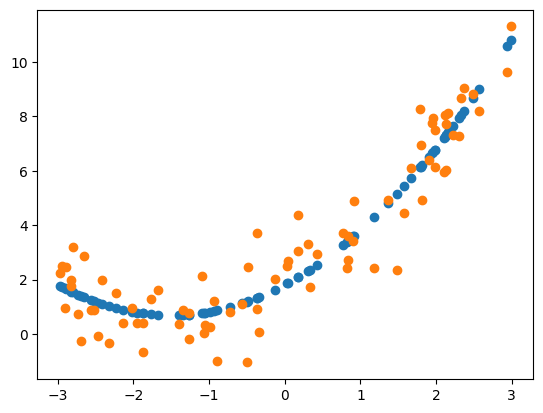

In [27]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

### Trying with degree 3

In [29]:
poly = PolynomialFeatures(degree=3, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)

print(score) # accuracy down

0.8866833219701025


### Prediction of New Data

In [30]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

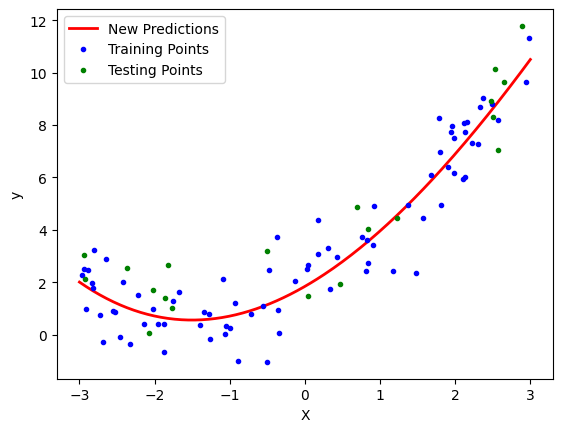

In [35]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, "b.", linewidth=2, label="Training Points")
plt.plot(X_test, y_test, "g.", label = "Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Pipeline Concepts

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train) # first creating polynomial and then fit of linear regression
    y_pred_new = poly_regression.predict(X_new)

    #plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label="Degree " + str(degree))
    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_test, y_test, 'g.', linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])

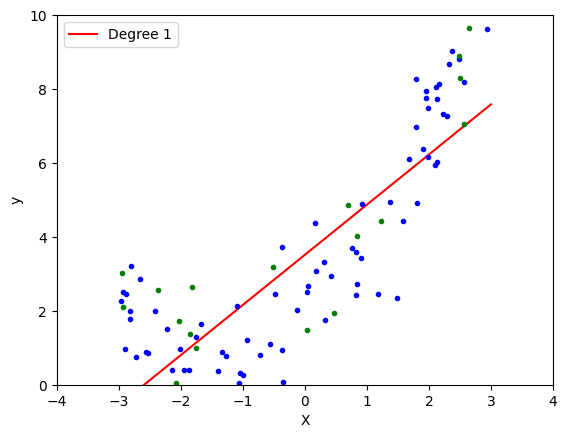

In [39]:
poly_regression(1)

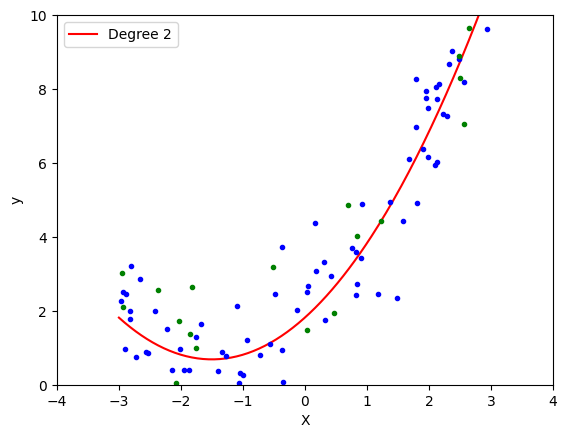

In [40]:
poly_regression(2)

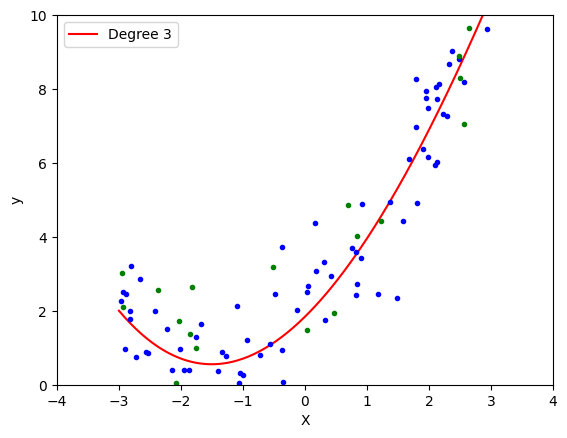

In [41]:
poly_regression(3)

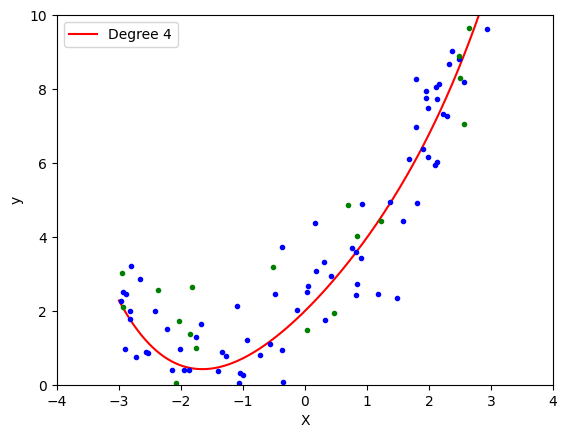

In [42]:
poly_regression(4)

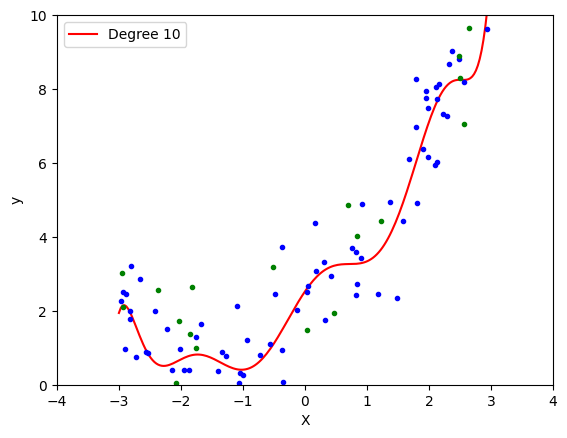

In [43]:
poly_regression(10) # trying to overfit all points
# green are test data points 
# blue are training

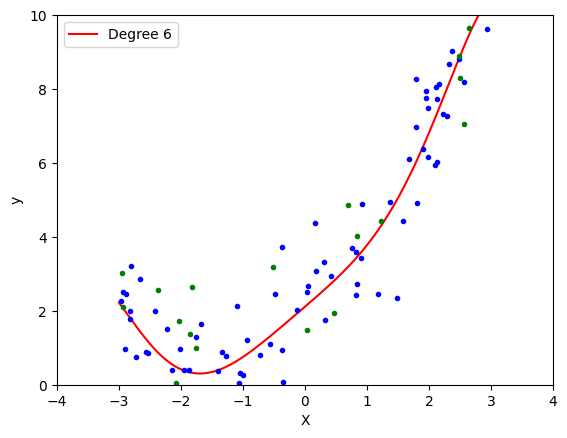

In [47]:
poly_regression(6)